In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"

import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [7]:
from datasets.carla import *
from tools.geometry import *
from tools.utils import *

%matplotlib inline
import matplotlib.pyplot as plt

from numpy.linalg import inv
import random

from tqdm.notebook import tqdm

In [8]:
carla_data = CarlaDataset("../../data/carla/val", False)

In [29]:
ood = Image.open(f"./pseudo/horse/2.png")

In [9]:
images, intrinsics, extrinsics, labels, oods = carla_data[128]

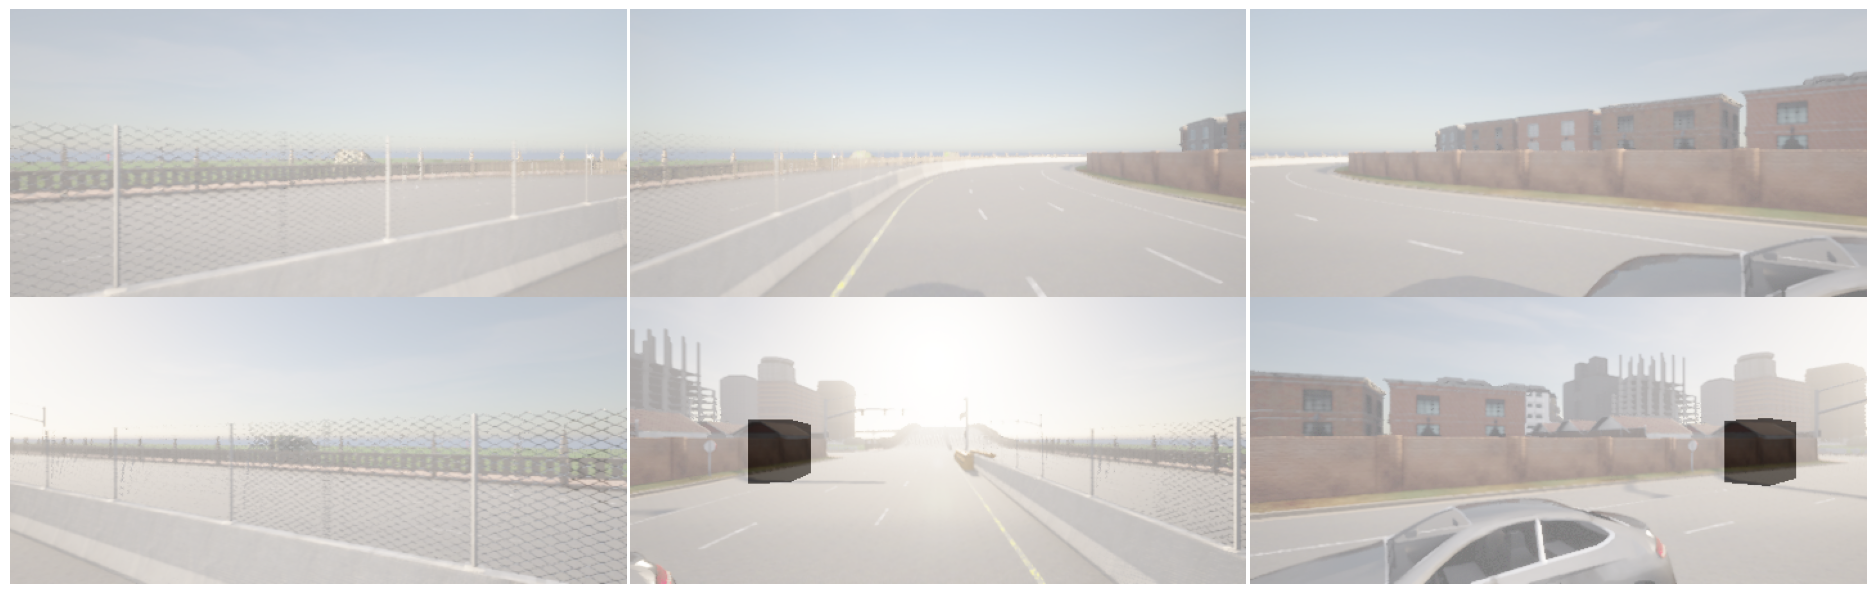

In [24]:
fig, axs = plt.subplots(2, 3, figsize=(3 * 8, 2 * 8 * (224/480)))
fig.subplots_adjust(wspace=0, hspace=0)

size = [2.1, 5.5, 3.5]
trans = [20, 10, size[2]/2]
rot = euler_to_quaternion(0, 0, random.randint(0, 360))

for i, ax in enumerate(axs.flatten()):
    image = np.transpose(images[i], (1, 2, 0))
    
    I = intrinsics[i]
    E = np.linalg.inv(extrinsics[i])

    bev_ood, cam_ood = draw_box(
        trans, rot, size, I, E,
        dataset='carla',
    )
                         
    ax.imshow(image)
    ax.imshow(cam_ood, alpha=.5)
    ax.axis("off")

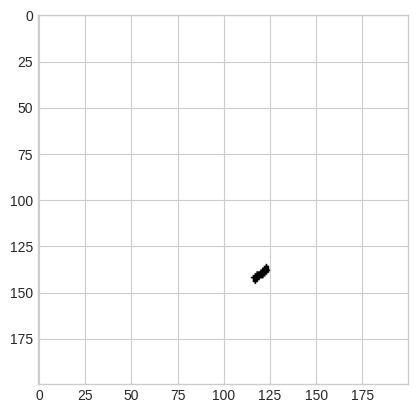